In [100]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np


In [101]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

# print("Path to dataset files:", path)

#"C:\Users\Anukarthi\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1"

In [102]:
#to avoid OOM error(out of memory error) by setting GPU memory consumption growth
gpus=tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [103]:
gpus

[]

In [104]:
import cv2 #opencv
import imghdr

In [105]:
data_dir=r"C:\Users\Anukarthi\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1"

print(os.listdir(data_dir))

['test', 'train']


In [106]:
data_dir_train=r"C:\Users\Anukarthi\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\train"

print(os.listdir(data_dir_train))

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [107]:
os.listdir(os.path.join(data_dir_train,'angry'))

['im0.png',
 'im1.png',
 'im10.png',
 'im100.png',
 'im1000.png',
 'im1001.png',
 'im1002.png',
 'im1003.png',
 'im1004.png',
 'im1005.png',
 'im1006.png',
 'im1007.png',
 'im1008.png',
 'im1009.png',
 'im101.png',
 'im1010.png',
 'im1011.png',
 'im1012.png',
 'im1013.png',
 'im1014.png',
 'im1015.png',
 'im1016.png',
 'im1017.png',
 'im1018.png',
 'im1019.png',
 'im102.png',
 'im1020.png',
 'im1021.png',
 'im1022.png',
 'im1023.png',
 'im1024.png',
 'im1025.png',
 'im1026.png',
 'im1027.png',
 'im1028.png',
 'im1029.png',
 'im103.png',
 'im1030.png',
 'im1031.png',
 'im1032.png',
 'im1033.png',
 'im1034.png',
 'im1035.png',
 'im1036.png',
 'im1037.png',
 'im1038.png',
 'im1039.png',
 'im104.png',
 'im1040.png',
 'im1041.png',
 'im1042.png',
 'im1043.png',
 'im1044.png',
 'im1045.png',
 'im1046.png',
 'im1047.png',
 'im1048.png',
 'im1049.png',
 'im105.png',
 'im1050.png',
 'im1051.png',
 'im1052.png',
 'im1053.png',
 'im1054.png',
 'im1055.png',
 'im1056.png',
 'im1057.png',
 'im1058.

In [108]:
for image_class in os.listdir(data_dir_train):
    class_path = os.path.join(data_dir_train, image_class)

    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)

        img = cv2.imread(image_path)

        if img is None:
            print("Corrupted image:", image_path)
            os.remove(image_path)


In [109]:
img=cv2.imread(os.path.join(data_dir,'train','sad','im4486.png'))
img.shape

(48, 48, 3)

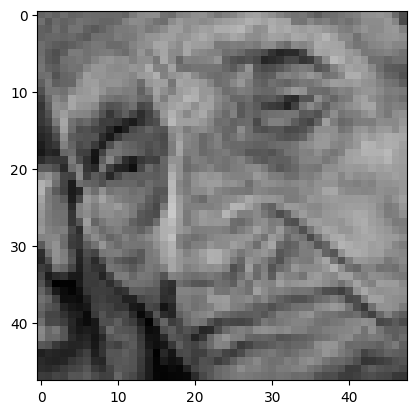

In [110]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [111]:
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    image_size=(32,32),
    batch_size=64
)

Found 28709 files belonging to 7 classes.


In [112]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [113]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    format='tf',
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_fo

In [114]:
data_iterator=dataset.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002AE86CF6200>)

In [115]:
#getting another batch
batch=data_iterator.next()
print(batch[0].shape)   #images are in batch[0]

#(32, 256, 256, 3)  - means 32 images in the batch that are 256x256 and have 3 channels(RGB)

print(batch[1].shape)   #labels are in batch[1]
print(batch[1])#prints each class 

(64, 32, 32, 3)
(64,)
[0 3 5 5 3 2 4 3 2 2 5 3 0 4 4 0 5 5 6 5 2 2 2 6 4 1 3 2 0 6 2 5 3 3 0 0 4
 3 6 3 2 2 3 2 5 3 4 0 3 2 4 3 1 2 5 3 3 5 4 3 5 2 5 2]


In [116]:
for images, labels in dataset.take(1):
    print(images.dtype)
    print(tf.reduce_max(images))


<dtype: 'float32'>
tf.Tensor(255.0, shape=(), dtype=float32)


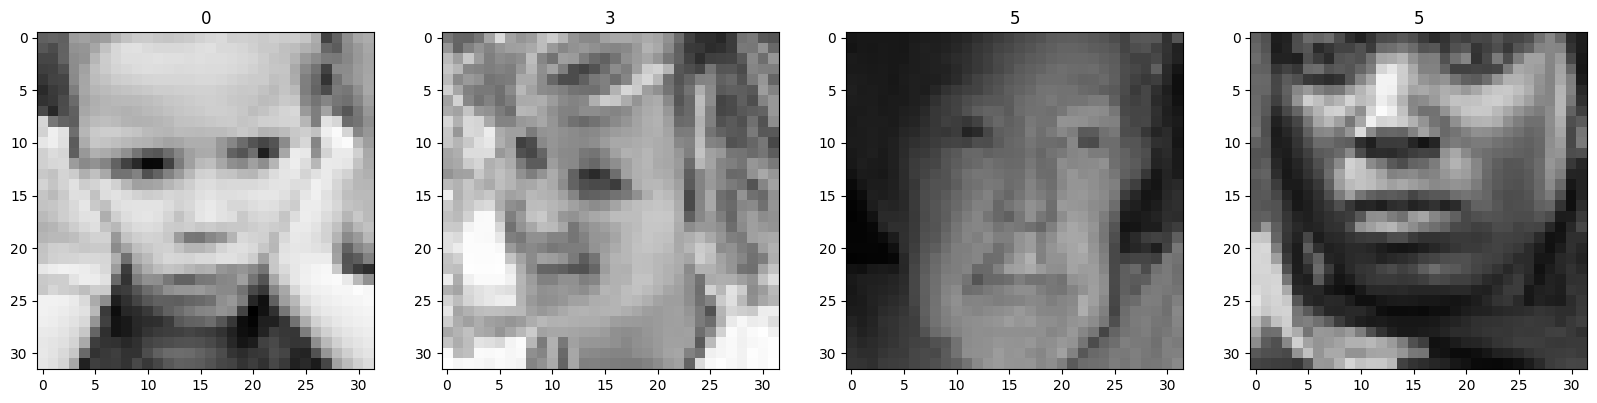

In [117]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

In [118]:
print(dataset.class_names)


['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


PREPROCESSING

In [119]:
scaled=batch[0]/255

print(scaled.min())
print(scaled.max())

#this cant be separately done for every single batch so we need to scale the entire data pipeline


0.0
1.0


In [120]:
#data.map allows us to perform the transformation in pipeline
#we use a lambda function to scale the entire data
#data has images and image labels ---- so x will be the images y will be the labels
#we scale x 
dataset=dataset.map(lambda x,y:(x/255,y))

In [121]:
scaled_iterator=dataset.as_numpy_iterator().next()

In [122]:
print(scaled_iterator[0].max())
print(scaled_iterator[0].min())

1.0
0.0


SPLITTING INTO TRAINING AND VALIDATION DATA

In [123]:
len(dataset)   #number of batches

449

In [124]:
train_size=int(len(dataset)*.8)
val_size=int(len(dataset)*.2)+1

In [125]:
print(train_size)
print(val_size)

359
90


In [126]:
train=dataset.take(train_size)
val=dataset.skip(train_size).take(val_size)


In [127]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache()
train = train.shuffle(1000)
train = train.prefetch(AUTOTUNE)

val = val.cache()
val = val.prefetch(AUTOTUNE)



BUILDING DEEP LEARNING MODEL

In [128]:
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import regularizers


Adding data augmentation

In [129]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


In [130]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    data_augmentation,

    # Block 1
    tf.keras.layers.Conv2D(32, (3,3), padding='same',kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3,3), strides=2, padding='same',kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    # Block 2
    tf.keras.layers.Conv2D(64, (3,3), padding='same',kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3,3), strides=2, padding='same',kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    # Block 3
    tf.keras.layers.Conv2D(128, (3,3), padding='same',kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])




Adding Class Weights

In [131]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_true),
    y=y_true
)

class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: np.float64(1.0703847300924545), 1: np.float64(9.238095238095237), 2: np.float64(1.0013950892857142), 3: np.float64(0.5780318891931068), 4: np.float64(0.8316533426022477), 5: np.float64(0.8223164165425593), 6: np.float64(1.233969400034382)}


Adding early stopping

In [132]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

Adding ModelCheckpoint

In [133]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor="val_accuracy",
    save_best_only=True
)


Compiling

In [134]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [135]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,119 (617.65 KB)

 Trainable params: 157,479 (615.15 KB)

 Non-trainable params: 640 (2.50 KB)

TRAINING DEEP NEURAL NETWORK

In [136]:
logdir='logs'

In [137]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [138]:
history=model.fit(train,epochs=50,validation_data=val,callbacks=[tensorboard_callback,early_stop,checkpoint],class_weight=class_weights)

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 89s 189ms/step - accuracy: 0.1737 - loss: 2.0811 - val_accuracy: 0.1690 - val_loss: 2.1105
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 56s 144ms/step - accuracy: 0.2225 - loss: 1.9927 - val_accuracy: 0.2259 - val_loss: 2.0137
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 49s 136ms/step - accuracy: 0.2305 - loss: 1.9390 - val_accuracy: 0.2137 - val_loss: 2.0435
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 48s 134ms/step - accuracy: 0.2442 - loss: 1.9033 - val_accuracy: 0.2627 - val_loss: 1.9440
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 150ms/step - accuracy: 0.2725 - loss: 1.8728 - val_accuracy: 0.1341 - val_loss: 2.2131
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.3004 - loss: 1.8415 - val_accuracy: 0.3183 - val_loss: 1.8633
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 48s 133ms/step - accuracy: 0.3200 - loss: 1.8058 - val_accuracy: 0.3525 - val_loss: 1.7609
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 46s 127ms/step - accuracy: 0.3262 - loss: 1

In [139]:
history.history

{'accuracy': [0.17370299994945526,
  0.22253656387329102,
  0.23050139844417572,
  0.24416783452033997,
  0.2725452780723572,
  0.30040040612220764,
  0.3200295865535736,
  0.3262099623680115,
  0.34279248118400574,
  0.35093140602111816,
  0.36263927817344666,
  0.3667305111885071,
  0.37578341364860535,
  0.38218140602111816,
  0.39475974440574646,
  0.39676183462142944,
  0.3998955488204956,
  0.40346449613571167,
  0.4010271728038788,
  0.40790390968322754,
  0.41121169924736023,
  0.4147806465625763,
  0.41499826312065125,
  0.4228760302066803,
  0.4253568947315216,
  0.42226672172546387,
  0.42496517300605774,
  0.4298398196697235,
  0.4363683760166168],
 'loss': [2.081059217453003,
  1.9927089214324951,
  1.93900465965271,
  1.903296709060669,
  1.8728386163711548,
  1.8414602279663086,
  1.8057852983474731,
  1.7831259965896606,
  1.763916015625,
  1.7373486757278442,
  1.7160688638687134,
  1.706555724143982,
  1.6952837705612183,
  1.6722396612167358,
  1.6617662906646729,
  

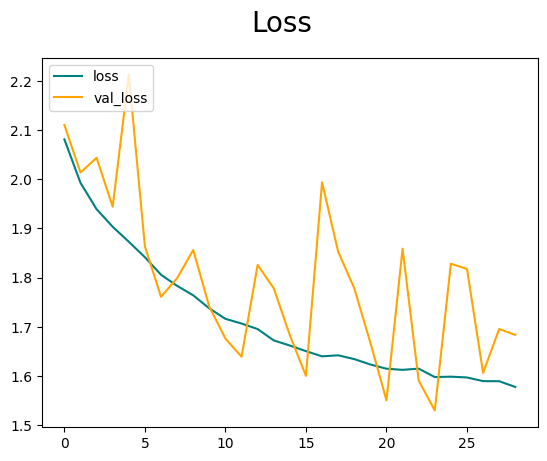

In [140]:
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

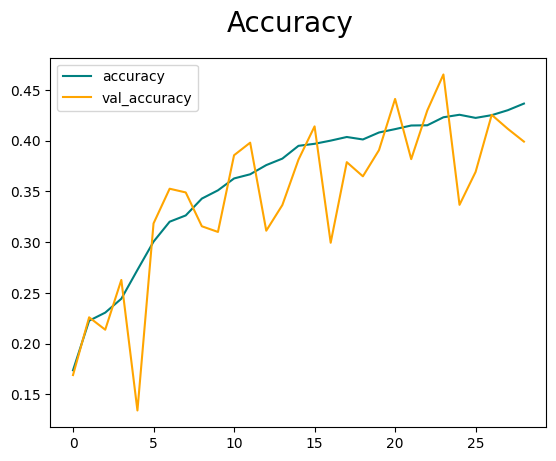

In [141]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [142]:
train_loss, train_accuracy = model.evaluate(train)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Train loss: {train_loss:.4f}")

359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4611 - loss: 1.5243
Train accuracy: 0.4611
Train loss: 1.5243


In [143]:
val_loss,val_accuracy=model.evaluate(val)
print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_accuracy:.4f}")

90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4650 - loss: 1.5297
Validation loss: 1.5297
Validation accuracy: 0.4650


EVALUATING OUR MODEL

In [144]:
data_dir_test=r"C:\Users\Anukarthi\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\test"

print(os.listdir(data_dir_test))

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [145]:
len(data_dir_test)

93

In [146]:
test = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    image_size=(32,32),
    batch_size=64,
    shuffle=False
)
class_names=test.class_names
print(class_names)


Found 7178 files belonging to 7 classes.
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [147]:
test=test.map(lambda x,y:(x/255,y))

In [148]:
scaled_iterator=test.as_numpy_iterator().next()
print(scaled_iterator[0].max())
print(scaled_iterator[0].min())

1.0
0.0


In [149]:
model.evaluate(test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.4561 - loss: 1.5349


[1.5348788499832153, 0.4561159014701843]

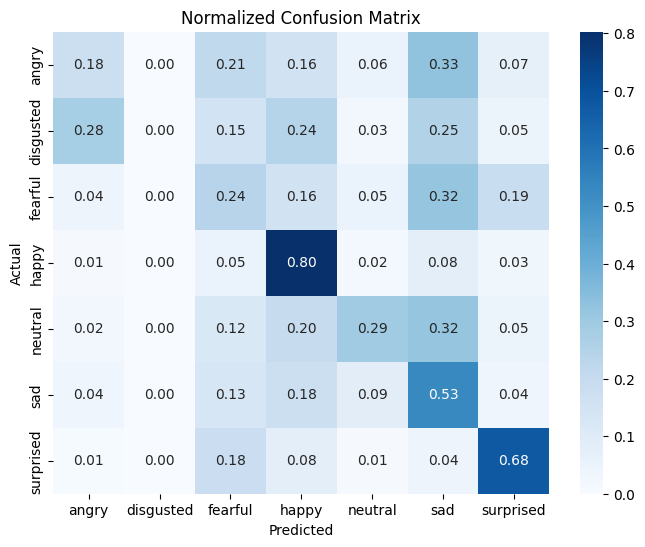

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, 
            annot=True, 
            fmt='.2f', 
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()




-Happy,surprised and sad have good recall values

-Sad is often confused with neutral and angry

-Most important observation is that disgust is completely ignored

In [151]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

       angry       0.49      0.18      0.26       958
   disgusted       0.00      0.00      0.00       111
     fearful       0.24      0.24      0.24      1024
       happy       0.62      0.80      0.70      1774
     neutral       0.58      0.29      0.39      1233
         sad       0.35      0.53      0.42      1247
   surprised       0.57      0.68      0.62       831

    accuracy                           0.48      7178
   macro avg       0.41      0.39      0.38      7178
weighted avg       0.48      0.48      0.45      7178



d:\.vscode\ML_PREP\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\.vscode\ML_PREP\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\.vscode\ML_PREP\.venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


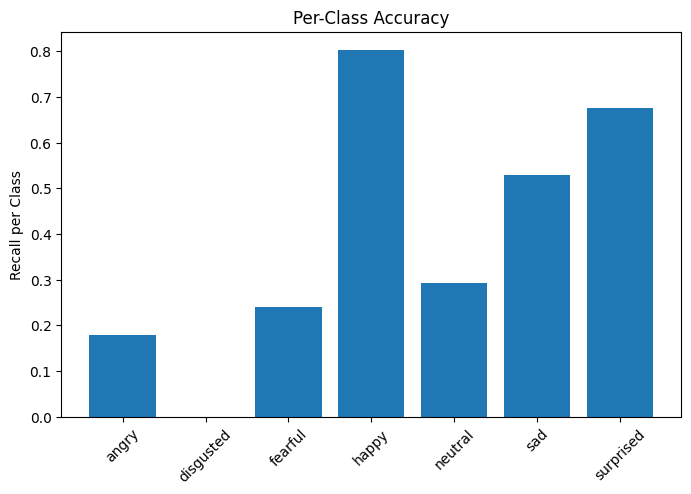

In [152]:
import numpy as np
import matplotlib.pyplot as plt

class_acc = np.diag(cm_normalized)

plt.figure(figsize=(8,5))
plt.bar(class_names, class_acc)
plt.xticks(rotation=45)
plt.ylabel("Recall per Class")
plt.title("Per-Class Accuracy")
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step 


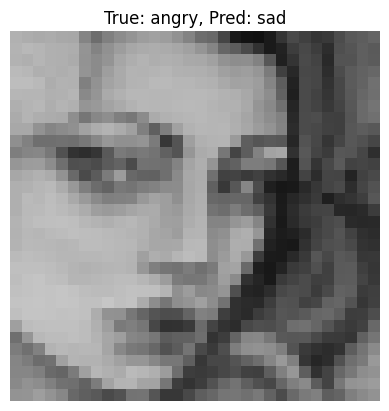

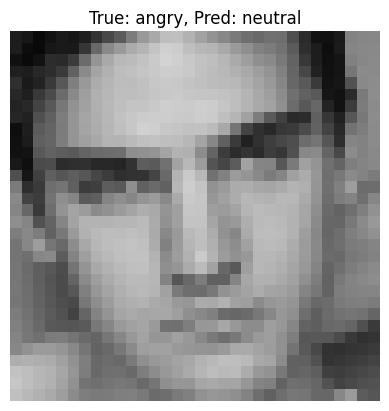

In [153]:
for X, y in test.take(1):
    preds = model.predict(X)
    preds = np.argmax(preds, axis=1)

    for i in range(5):
        if preds[i] != y[i]:
            plt.imshow(X[i].numpy())
            plt.title(f"True: {class_names[y[i]]}, Pred: {class_names[preds[i]]}")
            plt.axis("off")
            plt.show()
    


In [154]:
model.load_weights("best_model.keras")
model.evaluate(test)


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.4561 - loss: 1.5349


[1.5348788499832153, 0.4561159014701843]

Saving the Model

In [155]:
from tensorflow.keras.models import load_model

best_model = load_model("best_model.keras")
best_model.evaluate(test)


113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.4561 - loss: 1.5349


[1.5348788499832153, 0.4561159014701843]